### Dataframes from Original DART API CSVs

In [3]:
import pymysql
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 

warnings.filterwarnings("ignore", category=FutureWarning)

cnx = pymysql.connect(
    user="multi",
    password="Campus123!",
    host="ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com",
    database="Data_Lake",
)

query = "SELECT * FROM bs;"
bs = pd.read_sql(query, cnx)  # bs = pd.read_csv('bs.csv')

query = "SELECT * FROM incs;"
incs = pd.read_sql(query, cnx)  # incs = pd.read_csv('incs.csv')

query = "SELECT * FROM cf;"
cf = pd.read_sql(query, cnx)  # cf = pd.read_csv('cf.csv')

cnx.close()

bs["label_en"] = bs["label_en"].str.lower()
incs["label_en"] = incs["label_en"].str.lower()
cf["label_en"] = cf["label_en"].str.lower()

/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/286015425.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bs = pd.read_sql(query, cnx)  # bs = pd.read_csv('bs.csv')


/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/286015425.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  incs = pd.read_sql(query, cnx)  # incs = pd.read_csv('incs.csv')
/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/286015425.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cf = pd.read_sql(query, cnx)  # cf = pd.read_csv('cf.csv')


### EDA

### USEFUL FUNCTIONS 

In [4]:
def process_feature(df, prefix):

    years = ["2018", "2019", "2020", "2021", "2022"]

    for year in years:
        original_column = f"{prefix}_{year}"
        new_column = year
        df.rename(columns={original_column: new_column}, inplace=True)

    final_df = pd.melt(
        df, id_vars=["corp"], value_vars=years, var_name="year", value_name=prefix
    )

    final_df = final_df.sort_values(by=["corp", "year"]).reset_index(drop=True)

    return final_df


def find_missing_corps(main_df, subset_df):
    main_corp_unique = set(main_df["corp"].unique())
    subset_corp_unique = set(subset_df["corp"].unique())

    missing_corps = main_corp_unique - subset_corp_unique

    return missing_corps


def custom_drop_logic(group):
    null_counts = group.isnull().sum(axis=1)
    return group.loc[null_counts.idxmin()]


def feature_operation(
    incs,
    company_name,
    feature_name,
    feat1,
    feat2,
    years=["2018", "2019", "2020", "2021", "2022"],
):

    feature_1 = incs.loc[
        (incs["label_en"] == feat1) & (incs["corp"] == company_name), years
    ]
    feature_2 = incs.loc[
        (incs["label_en"] == feat2) & (incs["corp"] == company_name), years
    ]

    result_list = []

    for year in years:
        values1 = feature_1[year].values
        values2 = feature_2[year].values

        if values1.size > 0 and values2.size > 0:
            result = values1[0] + values2[0]
        else:
            result = np.nan

        result_list.append({"corp": company_name, "year": year, feature_name: result})

    result_df = pd.DataFrame(result_list)

    return result_df

### Sales (Revenue)

In [5]:
incs.loc[
    (incs["corp"] == "LG유플러스") & (incs["label_en"] == "operating income"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "LX홀딩스") & (incs["label_en"] == "operating income"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "대웅") & (incs["label_en"] == "duddjqtndlr"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "아이에이치큐") & (incs["label_en"] == "gross profit"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "카카오") & (incs["label_en"] == "gross profit"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "케이티스카이라이프") & (incs["label_en"] == "operating revenues"),
    "label_en",
] = "revenue"

revenue_list = [
    "revenue(sales)",
    "revenue",
    "sales(revenue)",
    "sales",
    "sales of goods",
    "net sales",
    "sales income",
    "sales account",
]

revenue = incs[incs["label_en"].isin((revenue_list))]

revenue = revenue.drop_duplicates(subset="corp", keep="first")

In [6]:
incs.loc[
    (incs["corp"] == "LG유플러스") & (incs["label_en"] == "operating income"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "LX홀딩스") & (incs["label_en"] == "operating income"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "대웅") & (incs["label_en"] == "duddjqtndlr"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "아이에이치큐") & (incs["label_en"] == "gross profit"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "카카오") & (incs["label_en"] == "gross profit"), "label_en"
] = "revenue"
incs.loc[
    (incs["corp"] == "케이티스카이라이프") & (incs["label_en"] == "operating revenues"),
    "label_en",
] = "revenue"

revenue_list = [
    "revenue(sales)",
    "revenue",
    "sales(revenue)",
    "sales",
    "sales of goods",
    "net sales",
    "sales income",
    "sales account",
]

revenue = incs[incs["label_en"].isin((revenue_list))]

revenue = revenue.drop_duplicates(subset="corp", keep="first")

feature_revenue = process_feature(revenue.copy(), "revenue")

find_missing_corps(incs, revenue)

mask = (feature_revenue["corp"] == "신성이엔지") & (feature_revenue["year"] == "2018")
feature_revenue.loc[mask] = feature_revenue.loc[mask].fillna(425000000000)

### Cost of Goods sold 

In [7]:
cost_of_sales_list = ["cost of sales"]

cost_of_sales = incs[incs["label_en"].isin((cost_of_sales_list))]

cost_of_sales = cost_of_sales.drop_duplicates(subset="corp", keep="first")

feature_cost_of_sales = process_feature(cost_of_sales.copy(), "cost_of_sales")

find_missing_corps(incs, cost_of_sales)

for corp in find_missing_corps(incs, cost_of_sales):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "cost_of_sales": 0}
        feature_cost_of_sales = feature_cost_of_sales.append(
            missing_corp_data, ignore_index=True
        )

mask = (feature_cost_of_sales["corp"] == "에스케이바이오팜") & (
    feature_cost_of_sales["year"] == "2018"
)
feature_cost_of_sales.loc[mask] = feature_cost_of_sales.loc[mask].fillna(0)

### Gross Profit

In [8]:
gross_profit_list = ["gross profit"]

gross_profit = incs[incs["label_en"].isin((gross_profit_list))]

gross_profit = gross_profit.drop_duplicates(subset="corp", keep="first")

feature_gross_profit = process_feature(gross_profit.copy(), "gross_profit")

merged_df = pd.merge(feature_revenue, feature_cost_of_sales, on=["corp", "year"])

companies = find_missing_corps(incs, gross_profit)
filtered_df = merged_df[merged_df["corp"].isin(companies)]

filtered_df["gross_profit"] = filtered_df["revenue"] - filtered_df["cost_of_sales"]

gross_profit_to_append = filtered_df[["corp", "year", "gross_profit"]]

feature_gross_profit = feature_gross_profit.append(gross_profit_to_append)

/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/993110306.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["gross_profit"] = filtered_df["revenue"] - filtered_df["cost_of_sales"]


### Operating Income

In [9]:
operating_income_ko_list = ["영업수익"]
operating_income_list = [
    "operating income(loss)",
    "sales account",
    "operating loss",
    "operating income",
    "operating profit",
    "operating profit (loss)",
    "operating profit(loss)",
    "operating profits",
]

operating_income = incs[
    (incs["label_en"].isin(operating_income_list))
    | (incs["label_ko"].isin(operating_income_ko_list))
]

filtered_operating_income = operating_income.groupby("corp", group_keys=False).apply(
    custom_drop_logic
)

feature_operating_income = process_feature(
    filtered_operating_income.copy(), "operating_income"
)

### Net Income

In [10]:
net_income_list = [
    "profit",
    "profit (loss)",
    "profit(loss)",
    "profit (loss) for the period",
    "profit(loss) for the period",
    "profit (loss) for the year",
    "loss (profit)",
    "net income(loss)",
    "net income",
    "profit for the year",
    "quarterly net income, attributable to",
    "semiannual net profit",
    "net profit during thr current term",
    "the year net profit(loss)",
    "net profit",
    "ifrs_profitloss",
    "quarterly net profit",
    "- profit (loss)",
]

net_income = incs[incs["label_en"].isin((net_income_list))]

net_income = net_income.drop_duplicates(subset="corp", keep="first")

feature_net_income = process_feature(net_income.copy(), "net_income")

mask = (incs["corp"] == "일진전기") & (
    incs["label_en"] == "profit (loss), attributable to non-controlling interests"
)
incs.loc[mask, "2018"] = 0
incs.loc[mask, "2019"] = 0
incs.loc[mask, "2020"] = 0
incs.loc[mask, "2021"] = 0
incs.loc[mask, "2022"] = 0

net_income_1 = feature_operation(
    incs,
    "남해화학",
    "net_income",
    "profit (loss), attributable to owners of parent",
    "profit (loss), attributable to non-controlling interests",
)
net_income_2 = feature_operation(
    incs,
    "일진전기",
    "net_income",
    "profit (loss), attributable to owners of parent",
    "profit (loss), attributable to non-controlling interests",
)

feature_net_income = feature_net_income.append(
    [net_income_1, net_income_2]
).reset_index(drop=True)

mask = (feature_net_income["corp"] == "미원홀딩스") & (feature_net_income["year"] == "2018")
feature_net_income.loc[mask] = feature_net_income.loc[mask].fillna(9740481883)

### EBITDA

In [11]:
# EBIT
ebit_list = [
    "profit (loss) before income tax expense",
    "net profit before income tax",
    "profit (loss) before tax",
    "profit before tax(loss)",
    "profit (loss) before income tax",
    "income before income tax expenses",
    "profit  before tax",
    "profit before income tax",
    "profit (loss) from continuing operations before tax",
    "income before income tax",
    "profit before tax",
    "profit (loss) before tax from continuing operations",
    "profit(loss) before tax",
    "net loss before income tax expense deduction",
    "loss (profit) before tax",
    "net income before income tax expense",
    "net income before income tax expense (net loss)",
]

ebit = incs[incs["label_en"].isin((ebit_list))]

ebit = ebit.drop_duplicates(subset="corp", keep="first")

feature_ebit = process_feature(ebit.copy(), "ebit")

find_missing_corps(incs, ebit)

set()

In [12]:
depreciation_ko_list = ["감가상각비",]
depreciation_list = ["adjustments for depreciation expense", 'depreciation expense(tangible assets)']

depreciation = cf[
    (cf["label_en"].isin(depreciation_list)) | (cf["label_ko"].isin(depreciation_ko_list))
]

filtered_depreciation = depreciation.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_depreciation = process_feature(filtered_depreciation.copy(), "depreciation")


for corp in find_missing_corps(cf, depreciation):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "depreciation": 0}
        feature_depreciation = feature_depreciation.append(
            missing_corp_data, ignore_index=True
        )
        
feature_depreciation['depreciation'].fillna(0, inplace=True)

In [13]:
amortization_ko_list = ["무형자산상각비"]
amortization_list = ["adjustments for amortisation expense"]

amortization = cf[
    (cf["label_en"].isin(amortization_list)) | (cf["label_ko"].isin(amortization_ko_list))
]

filtered_amortization = amortization.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_amortization = process_feature(filtered_amortization.copy(), "amortization")

for corp in find_missing_corps(cf, amortization):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "amortization": 0}
        feature_amortization = feature_amortization.append(
            missing_corp_data, ignore_index=True
        )

feature_amortization['amortization'].fillna(0, inplace=True)

In [14]:
merged_df = pd.merge(feature_ebit, feature_depreciation, on=["corp", "year"])
merged_df = pd.merge(merged_df, feature_amortization, on=["corp", "year"])

merged_df["ebitda"] = (
    merged_df["ebit"] + merged_df["depreciation"] + merged_df["amortization"]
)

feature_ebitda = merged_df[["corp", "year", "ebitda"]]

### Total Equity

In [15]:
total_equity_list = ["total equity", "qq", "total amount of capital", "total equtiy"]

total_equity = bs[bs["label_en"].isin((total_equity_list))]

total_equity = total_equity.drop_duplicates(subset="corp", keep="first")

feature_total_equity = process_feature(total_equity.copy(), "total_equity")

find_missing_corps(bs, total_equity)

set()

### Total Assets

In [16]:
total_assets = bs[bs["label_en"] == "total assets"]

total_assets.drop_duplicates(subset="corp", keep="first")

find_missing_corps(bs, total_assets)

feature_total_assets = process_feature(total_assets.copy(), "total_assets")

feature_total_assets = feature_total_assets.reset_index(drop=True)

### Total Liabilities

In [17]:
total_liabilities = bs[bs["label_en"] == "total liabilities"]

total_liabilities.drop_duplicates(subset="corp", keep="first")

find_missing_corps(bs, total_liabilities)

feature_total_liabilities = process_feature(
    total_liabilities.copy(), "total_liabilities"
)

feature_total_liabilities = feature_total_liabilities.reset_index(drop=True)

### Current Assets

In [18]:
current_assets = bs[bs["label_en"] == "current assets"].drop_duplicates(
    subset="corp", keep="first"
)

feature_current_assets = process_feature(current_assets.copy(), "current_assets")
feature_current_assets = feature_current_assets.reset_index(drop=True)

feature_current_assets[feature_current_assets["corp"] == "아남전자"]

values_to_set = {
    2018: 61980000000,
    2019: 66190000000,
    2020: 86620000000,
    2021: 121540000000,
    2022: 107050000000,
}

for year, value in values_to_set.items():
    mask = (feature_current_assets["corp"] == "아남전자") & (
        feature_current_assets["year"] == str(year)
    )
    feature_current_assets.loc[mask, "current_assets"] = value

### Current Liabilities

In [19]:
current_liabilities = bs[bs["label_en"] == "current liabilities"].drop_duplicates(
    subset="corp", keep="first"
)

feature_current_liabilities = process_feature(
    current_liabilities.copy(), "current_liabilities"
)
feature_current_liabilities = feature_current_liabilities.reset_index(drop=True)

values_to_set = {
    2018: 26100000000,
    2019: 30070000000,
    2020: 50710000000,
    2021: 74444000000,
    2022: 48040000000,
}

for year, value in values_to_set.items():
    mask = (feature_current_liabilities["corp"] == "아남전자") & (
        feature_current_liabilities["year"] == str(year)
    )
    feature_current_liabilities.loc[mask, "current_liabilities"] = value

### Non-current Liabilities

In [20]:
non_current_liabilities_list = ["non-current liabilities"]

non_current_liabilities = bs[bs["label_en"].isin((non_current_liabilities_list))]

non_current_liabilities = non_current_liabilities.drop_duplicates(
    subset="corp", keep="first"
)

non_current_liabilities = process_feature(
    non_current_liabilities.copy(), "non_current_liabilities"
)

feature_non_current_liabilities = non_current_liabilities.reset_index(drop=True)

values_to_set = {
    2018: 4490000000,
    2019: 1540000000,
    2020: 730000000,
    2021: 6580000000,
    2022: 4940000000,
}

for year, value in values_to_set.items():
    mask = (feature_non_current_liabilities["corp"] == "아남전자") & (
        feature_non_current_liabilities["year"] == str(year)
    )
    feature_non_current_liabilities.loc[mask, "non_current_liabilities"] = value

### Borrowings 

In [21]:
short_borrowing_ko_list = ["단기차입금"]
short_borrowing_list = ["short-term borrowings"]

short_borrowing = bs[
    (bs["label_en"].isin(short_borrowing_list)) | (bs["label_ko"].isin(short_borrowing_ko_list)) | (bs['concept_id'].isin(['ifrs-full_ShorttermBorrowings']))
]

filtered_short_borrowing = short_borrowing.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_short_borrowing = process_feature(filtered_short_borrowing.copy(), "short_borrowing")

feature_short_borrowing = feature_short_borrowing.fillna(0)

for corp in find_missing_corps(incs, short_borrowing):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "short_borrowing": 0}
        feature_short_borrowing = feature_short_borrowing.append(
            missing_corp_data, ignore_index=True
        )
        

long_borrowing_ko_list = ["장기차입금"]
long_borrowing_list = ["long-term borrowings, gross", 'non-current financial liabilities, net']

long_borrowing = bs[
    (bs["label_en"].isin(long_borrowing_list)) | (bs["label_ko"].isin(long_borrowing_ko_list)) | (bs['concept_id'].isin(['dart_LongTermBorrowingsGross']))
]

filtered_long_borrowing = long_borrowing.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_long_borrowing = process_feature(filtered_long_borrowing.copy(), "long_borrowing")

feature_long_borrowing = feature_long_borrowing.fillna(0)

for corp in find_missing_corps(incs, long_borrowing):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "long_borrowing": 0}
        feature_long_borrowing = feature_long_borrowing.append(
            missing_corp_data, ignore_index=True
        )

### Net Liabilities

In [22]:
# Net Liabilities = Total Liabilities - Cash and Cash Equivalents

In [23]:
cash_and_equivalents_list = ["cash and cash equivalents"]

cash_and_equivalents = bs[bs["label_en"].isin((cash_and_equivalents_list))]

cash_and_equivalents = cash_and_equivalents.drop_duplicates(subset="corp", keep="first")

feature_cash_and_equivalents = process_feature(
    cash_and_equivalents.copy(), "cash_and_equivalents"
)

find_missing_corps(bs, cash_and_equivalents)

set()

### Retained Earnings

In [24]:
retained_earnings_list = [
    "retained earnings",
    "retained earning",
    "retainedearnings" "retained earnings(accumulated deficits)",
    "entity00146542_udf_bs_20183261650528_equityabstract",
    "accumulated deficit",
    "retainedearnings",
    "retained earnings(accumulated deficits)",
    "retained earnings(accumulated deficit)",
    "a",
    "retained earnings (deficit)",
    "na24",
]

retained_earnings = bs[bs["label_en"].isin((retained_earnings_list))]

retained_earnings = retained_earnings.drop_duplicates(subset="corp", keep="first")

feature_retained_earnings = process_feature(
    retained_earnings.copy(), "retained_earnings"
)

find_missing_corps(bs, retained_earnings)

set()

### Tangible Assets 

In [25]:
# Tangible Assets
tangible_assets_ko_list = ["유형자산", "유형자산 및 사용권자산", "4.유형자산"]
tangible_assets_list = ["tangible assets"]

tangible_assets = bs[
    (bs["label_en"].isin(tangible_assets_list))
    | (bs["label_ko"].isin(tangible_assets_ko_list))
]

filtered_tangible_assets = tangible_assets.groupby("corp", group_keys=False).apply(
    custom_drop_logic
)

feature_tangible_assets = process_feature(
    filtered_tangible_assets.copy(), "tangible_assets"
)

find_missing_corps(bs, tangible_assets)

set()

### Intangible Assets

In [26]:
# Intangible Assets
intangible_assets_ko_list = ["무형자산", "영업권및무형자산", "영업권 및 무형자산", "영업권 및 기타무형자산"]

intangible_assets_list = [
    "intangible assets",
    "intangible assets other than goodwill",
    "other intangible assets, gross",
    "iintangible assets",
    "goodwill&other intangible assets, gross",
    "intangible assets, gross",
    "goodwill, gross",
]

intangible_assets = bs[
    (bs["label_en"].isin(intangible_assets_list))
    | (bs["label_ko"].isin(intangible_assets_ko_list))
]

intangible_assets = intangible_assets.drop_duplicates(subset="corp", keep="first")

feature_intangible_assets = process_feature(
    intangible_assets.copy(), "intangible_assets"
)

find_missing_corps(bs, intangible_assets)

feature_intangible_assets["intangible_assets"].fillna(0, inplace=True)

for corp in find_missing_corps(incs, intangible_assets):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "intangible_assets": 0}
        feature_intangible_assets = feature_intangible_assets.append(
            missing_corp_data, ignore_index=True
        )

### Accounts Receivable

In [27]:
accounts_receivable_ko_list = ["매출채권", "매출채권 및 기타채권", "매출채권및기타채권"]
accounts_receivable_list = [
    "trade and other current receivables",
    "trade and other receivables",
    "short-term trade receivable",
    "quick assets",
]

accounts_receivable = bs[
    (bs["label_en"].isin(accounts_receivable_list))
    | (bs["label_ko"].isin(accounts_receivable_ko_list))
]


filtered_accounts_receivable = accounts_receivable.groupby(
    "corp", group_keys=False
).apply(custom_drop_logic)

feature_accounts_receivable = process_feature(
    filtered_accounts_receivable.copy(), "accounts_receivable"
)

find_missing_corps(bs, filtered_accounts_receivable)

mask = feature_accounts_receivable["corp"] == "LG헬로비전"
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(
    151417834909
)

mask = (feature_accounts_receivable["corp"] == "디와이파워") & (
    feature_accounts_receivable["year"] == "2018"
)
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(
    82570716535
)

mask = (feature_accounts_receivable["corp"] == "디와이파워") & (
    feature_accounts_receivable["year"] == "2019"
)
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(
    68055002877
)

for corp in find_missing_corps(bs, accounts_receivable):
    for year in ["2018", "2019", "2020", "2021", "2022"]:
        missing_corp_data = {"corp": corp, "year": year, "accounts_receivable": 0}
        feature_accounts_receivable = feature_accounts_receivable.append(
            missing_corp_data, ignore_index=True
        )

mask = (feature_accounts_receivable["corp"] == "에스케이바이오팜") & (
    feature_accounts_receivable["year"] == "2018"
)
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(0)

mask = (feature_accounts_receivable["corp"] == "일성건설") & (
    feature_accounts_receivable["year"] == "2018"
)
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(
    95565196656
)

mask = (feature_accounts_receivable["corp"] == "오리온홀딩스") & (
    feature_accounts_receivable["year"] == "2018"
)
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(
    176440000000
)

mask = (feature_accounts_receivable["corp"] == "오리온홀딩스") & (
    feature_accounts_receivable["year"] == "2019"
)
feature_accounts_receivable.loc[mask] = feature_accounts_receivable.loc[mask].fillna(
    183420000000
)

### Inventory

In [28]:
inventories_list = ["inventories"]

inventories = bs[bs["label_en"].isin((inventories_list))]

inventories = inventories.drop_duplicates(subset="corp", keep="first")

inventories = process_feature(inventories.copy(), "inventory")

In [29]:
corps = list(find_missing_corps(bs, inventories))
years = ["2018", "2019", "2020", "2021", "2022"]

data = []
for corp in corps:
    for year in years:
        data.append({"corp": corp, "year": year, "inventory": 0})

inventory_df = pd.DataFrame(data, columns=inventories.columns)

feature_inventory = pd.concat([inventories, inventory_df], ignore_index=True)

mask = (feature_inventory["corp"] == "남광토건") & (feature_inventory["year"] == "2021")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(0)

mask = (feature_inventory["corp"] == "남광토건") & (feature_inventory["year"] == "2022")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(0)

mask = (feature_inventory["corp"] == "쏘카") & (feature_inventory["year"] == "2021")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(0)

mask = (feature_inventory["corp"] == "쏘카") & (feature_inventory["year"] == "2022")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(0)

mask = (feature_inventory["corp"] == "아이에이치큐") & (feature_inventory["year"] == "2022")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(1163920003)

mask = (feature_inventory["corp"] == "키다리스튜디오") & (feature_inventory["year"] == "2018")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(0)

mask = (feature_inventory["corp"] == "한전산업") & (feature_inventory["year"] == "2020")
feature_inventory.loc[mask] = feature_inventory.loc[mask].fillna(0)

### Accounts Payable

In [30]:
accounts_payable_ko_list = [
    "매입채무",
    "매입채무 및 기타유동채무",
    "매입채무 및 기타채무",
    "단기매입채무",
    "매입채무및기타채무",
    "매입채무 및 기타금융부채",
]
accounts_payable_list = [
    "trade and other current payables",
    "trade and other payables",
    "short-term trade payables",
    "other accounts payable",
    "account payables and other payables",
    "long-term trade and other non-current payables",
    "other current payables",
    "other current financial liabilities",
]

accounts_payable = bs[
    (bs["label_en"].isin(accounts_payable_list))
    | (bs["label_ko"].isin(accounts_payable_ko_list))
]


def custom_drop_logic(group):
    null_counts = group.isnull().sum(axis=1)

    return group.loc[null_counts.idxmin()]


filtered_accounts_payable = accounts_payable.groupby("corp", group_keys=False).apply(
    custom_drop_logic
)

feature_accounts_payable = process_feature(
    filtered_accounts_payable.copy(), "accounts_payable"
)

find_missing_corps(bs, filtered_accounts_payable)

mask = (feature_accounts_payable["corp"] == "에스케이바이오팜") & (
    feature_accounts_payable["year"] == "2018"
)
feature_accounts_payable.loc[mask] = feature_accounts_payable.loc[mask].fillna(0)

mask = (feature_accounts_payable["corp"] == "에스케이바이오팜") & (
    feature_accounts_payable["year"] == "2019"
)
feature_accounts_payable.loc[mask] = feature_accounts_payable.loc[mask].fillna(0)

mask = (feature_accounts_payable["corp"] == "일성건설") & (
    feature_accounts_payable["year"] == "2018"
)
feature_accounts_payable.loc[mask] = feature_accounts_payable.loc[mask].fillna(
    38700000000
)

mask = (feature_accounts_payable["corp"] == "일성건설") & (
    feature_accounts_payable["year"] == "2018"
)
feature_accounts_payable.loc[mask] = feature_accounts_payable.loc[mask].fillna(
    38700000000
)

### Number of shares outstanding
- Whenever number of shares outstanding data is updated in DART API, use the crawling code below to get outstanding shares data

In [31]:
# import dart_fss as dart

# api_key='58b7a0538b393d6c96f7f93b31101d5f407c9d1d'
# dart.set_api_key(api_key=api_key)

# corp_list = dart.get_corp_list()
# kospi_list = corp_list.find_by_corp_name(corp_name='', market='Y')

# successful_list = list(bs['corp'].unique())
# kospi_list = [comp.corp_name for comp in kospi_list]
# failed_list = [comp for comp in kospi_list if comp not in successful_list]

In [32]:
# import requests

# corp_dict = {}

# kospi_list

# for comp in kospi_list:
#     corp_dict[comp.corp_name] = comp.corp_code

# for key in failed_list:
#     if key in corp_dict:
#         del corp_dict[key]

# url = 'https://opendart.fss.or.kr/api/stockTotqySttus.json'
# api_key = '58b7a0538b393d6c96f7f93b31101d5f407c9d1d'
# years = ['2018', '2019', '2020', '2021', '2022']

# results = []

# for corp_name, corp_code in corp_dict.items():
#     for year in years:
#         params = {
#             'crtfc_key': api_key,
#             'corp_code': corp_code,
#             'bsns_year': year,
#             'reprt_code': '11011'
#         }

#         response = requests.get(url, params=params)

#         if response.status_code == 200:
#             data = response.json()

#             total_outstanding_shares = 0
#             for entry in data.get('list', []):
#                 outstanding_shares = entry.get('istc_totqy', '0').replace(',', '')
#                 if outstanding_shares.isdigit():
#                     total_outstanding_shares += int(outstanding_shares)

#             results.append({
#                 'company_name': corp_name,
#                 'year': year,
#                 'total_outstanding_shares': total_outstanding_shares
#             })

#         else:
#             print(f'Error: Unable to fetch data for {corp_name} in {year}. HTTP Status code: {response.status_code}')

# df = pd.DataFrame(results)

# df = df.pivot(index='company_name', columns='year', values='total_outstanding_shares')

# df.reset_index(inplace=True)

In [33]:
cnx = pymysql.connect(
    user="multi",
    password="Campus123!",
    host="ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com",
    database="Data_Lake",
)

query = "SELECT * FROM Data_Lake.outstanding_shares;"
outstanding_shares = pd.read_sql(query, cnx)
cnx.close()

corp_list = list(bs["corp"].unique())

outstanding_shares = (
    outstanding_shares[outstanding_shares["company_name"].isin(corp_list)]
    .copy()
    .reset_index(drop=True)
)

columns_to_convert = ["2018", "2019", "2020", "2021", "2022"]

for column in columns_to_convert:
    outstanding_shares[column] = (
        outstanding_shares[column]
        .str.replace(",", "")
        .replace("-", "0")
        .fillna("0")
        .astype(int)
    )

# outstanding_shares = pd.read_csv("outstanding_shares.csv")

/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/3395825810.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  outstanding_shares = pd.read_sql(query, cnx)


In [34]:
feature_outstanding_shares = pd.melt(
    outstanding_shares,
    id_vars=["company_name"],
    var_name="year",
    value_name="outstanding_shares",
)
feature_outstanding_shares = feature_outstanding_shares.rename(
    columns={"company_name": "corp"}
)

### Cash Flows from Operating Activities

In [35]:
cfps_list = [
    "cash flows from (used in) operating activities",
    "cash flows from operating activities",
    "operating activity cash flow",
    "net cash flows from operating activities",
    "operating activities",
    "i. cash flows from (used in) operating activities",
    "cash flows provided by operating activities",
]

cfps = cf[cf["label_en"].isin((cfps_list))]

filtered_cfps = cfps.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_cash_flow = process_feature(filtered_cfps.copy(), "cash_flow_operating")

feature_cash_flow.reset_index(drop=True, inplace=True)

mask = feature_cash_flow["corp"] == "SK케미칼"
feature_cash_flow.loc[mask] = feature_cash_flow.loc[mask].fillna(122100000000)


corps_names = ["이마트", "인지컨트롤스", "동원산업", "삼성전기", "현대엘리베이터"]
years = ["2018", "2019", "2020", "2021", "2022"]

# NULL값 직접 채우기
values_to_fill_by_company = [
    [770000000000, 815700000000, 1386000000000, 987100000000, 745700000000],
    [7800000000, 40500000000, 31700000000, 14900000000, 13800000000],
    [53000000000, 193200000000, 402200000000, 587200000000, 499200000000],
    [1558700000000, 1021200000000, 1588000000000, 1731200000000, 1575300000000],
    [168600000000, 102000000000, 156100000000, 134300000000, -13500000000],
]

for corp_name, values_to_fill in zip(corps_names, values_to_fill_by_company):
    for year, value in zip(years, values_to_fill):
        mask = (feature_cash_flow["corp"] == corp_name) & (
            feature_cash_flow["year"] == year
        )
        feature_cash_flow.loc[mask] = feature_cash_flow.loc[mask].fillna(value)

### Selling, General & Administrative expenses (SG&A)


In [36]:
sga_ko_list = ["판매비와관리비", "관리비", "판매리와관리비", "판매비와 관리비"]
sga_list = [
    "selling general administrative expenses",
    "administrative expenses",
    "sales expenses",
    "general administrative expenses",
    "other cost of sales",
    "elling expenses",
]

sga = incs[(incs["label_en"].isin(sga_list)) | (incs["label_ko"].isin(sga_ko_list))]

filtered_sga = sga.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_sga = process_feature(
    filtered_sga.copy(), "selling_general_administrative_expenses"
)

In [37]:
# 없는 값 직접 채우기
sga_data = {
    "AJ네트웍스": [1066760000, 984610000, 850870000, 933880000, 1132920000],
    "CJ CGV": [834630000, 1820300000, 972100000, 977760000, 1358070000],
    "KTcs": [1003620000, 933520000, 913840000, 944680000, 1005140000],
    "LG헬로비전": [993900000, 992960000, 934340000, 927220000, 938620000],
    "LX홀딩스": [np.nan, np.nan, np.nan, 30220000000, 39890000000],
    "NAVER": [4644370000, 3201210000, 4088800000, 5492120000, 6915410000],
    "NICE": [1315630000, 1720010000, 1902370000, 2305600000, 2607680000],
    "SK디앤디": [56280000, 49730000, 85500000, 671970000, 499090000],
    "SK렌터카": [630680000, 467690000, 578120000, 750200000, 903990000],
    "SK텔레콤": [15672200000, 16632540000, 14839170000, 15361420000, 15692900000],
    "넷마블": [1779620000, 1976030000, 2212720000, 2355880000, 2782100000],
    "대구백화점": [138370000, 115720000, 108660000, 99870000, 92200000],
    "도화엔지니어링": [385180000, 489060000, 550910000, 557410000, 543880000],
    "롯데관광개발": [28900000, 38960000, 88150000, 238320000, 302390000],
    "롯데렌탈": [1753900000, 1924680000, 2092120000, 2177160000, 2430550000],
    "모두투어리츠": [25300000, 29300000, 26100000, 27400000, 27400000],
    "쏘카": [192550000, 328270000, 286150000, 309970000, 388040000],
    "에이플러스에셋": [184000000, 248490000, 261980000, 124680000, 134480000],
    "엔씨소프트": [1100190000, 1222190000, 1591390000, 1931740000, 2007790000],
    "엔에이치엔": [1195930000, 1401920000, 1555500000, 1825810000, 2075820000],
    "카카오페이": [166030000, 206410000, 302280000, 485870000, 567190000],
    "케이탑리츠": [38200000, 38800000, 42000000, 139800000, 40900000],
    "케이티": [22198620000, 23182500000, 22732560000, 23226180000, 23959920000],
    "케이티스카이라이프": [624090000, 625280000, 624870000, 690200000, 971040000],
    "크라운해태홀딩스": [327540000, 262330000, 268290000, 259080000, 258510000],
    "크래프톤": [819780000, 728180000, 896560000, 1234740000, 1102410000],
    "풀무원": [518780000, 559450000, 565520000, 617720000, 674090000],
    "하나투어": [803400000, 607140000, 224440000, 167550000, 216150000],
    "한미사이언스": [697000000, 800470000, 832230000, 921410000, 1017940000],
    "호텔신라": [2042420000, 2120770000, 1280660000, 1603900000, 2682580000],
}

years = ["2018", "2019", "2020", "2021", "2022"]

values_list = []
for corp, values in sga_data.items():
    for year, value in zip(years, values):
        values_list.append(
            {
                "corp": corp,
                "year": year,
                "selling_general_administrative_expenses": value,
            }
        )

feature_sga_to_append = pd.DataFrame(values_list)

feature_sga = feature_sga.append(feature_sga_to_append)

feature_sga.loc[
    (feature_sga["corp"] == "LG유플러스") & (feature_sga["year"] == "2018"),
    "selling_general_administrative_expenses",
] = 10984920000000
feature_sga.loc[
    (feature_sga["corp"] == "LG유플러스") & (feature_sga["year"] == "2019"),
    "selling_general_administrative_expenses",
] = 11695730000000

### Cash Flows from Investing Activities

In [38]:
cash_flow_investing_ko_list = [
    "투자활동 현금흐름",
    "투자활동현금흐름",
    "투자활동으로 인한 현금흐름",
    "II. 투자활동현금흐름",
]
cash_flow_investing_list = [
    "cash flows from investing activities",
    "cash flows from (used in) investing activities",
    "investing activities",
    "cash flows from (used in) investing activities.",
]

cash_flow_investing = cf[
    (cf["label_en"].isin(cash_flow_investing_list))
    | (cf["label_ko"].isin(cash_flow_investing_ko_list))
]

filtered_cash_flow_investing = cash_flow_investing.groupby(
    "corp", group_keys=False
).apply(custom_drop_logic)

feature_cash_flow_investing = process_feature(
    filtered_cash_flow_investing.copy(), "cash_flow_investing"
)

update_values = {
    "SK케미칼": {"2019": -1007.5},
    "제주항공": {"2018": -63.2},
    "동원산업": {
        "2018": -663.4,
        "2019": -499.6,
        "2020": -1305.2,
        "2021": -4775.6,
        "2022": 66.4,
    },
    "이마트": {
        "2018": -8167.8,
        "2019": -10050.8,
        "2020": -783.1,
        "2021": -39012.2,
        "2022": -7143.7,
    },
    "인지컨트롤스": {
        "2018": -317.0,
        "2019": -709.7,
        "2020": -318.1,
        "2021": -321.5,
        "2022": -388.1,
    },
    "현대엘리베이터": {
        "2018": -1364.4,
        "2019": -3475.7,
        "2020": 576.3,
        "2021": -2806.3,
        "2022": -1553.3,
    },
}

conversion_factor = 100000000

for corp, years in update_values.items():
    for year, value in years.items():
        adjusted_value = value * conversion_factor
        feature_cash_flow_investing.loc[
            (feature_cash_flow_investing["corp"] == corp)
            & (feature_cash_flow_investing["year"] == year),
            "cash_flow_investing",
        ] = adjusted_value

### Cash Flows from Financing Activities

In [39]:
cash_flow_financing_ko_list = [
    "재무활동 현금흐름",
    "III. 재무활동현금흐름",
    "재무활동으로 인한 현금흐름",
    "재무활동현금흐름",
]
cash_flow_financing_list = [
    "cash flows from financing activities",
    "cash flows from (used in) financing activities.",
    "cash flows from (used in) financing activities",
]

cash_flow_financing = cf[
    (cf["label_en"].isin(cash_flow_financing_list))
    | (cf["label_ko"].isin(cash_flow_financing_ko_list))
]

filtered_cash_flow_financing = cash_flow_financing.groupby(
    "corp", group_keys=False
).apply(custom_drop_logic)

feature_cash_flow_financing = process_feature(
    filtered_cash_flow_financing.copy(), "cash_flow_financing"
)

update_values = {
    "SK케미칼": {"2019": 1171.5},
    "동원산업": {
        "2018": -897.9,
        "2019": -900.2,
        "2020": -2129.5,
        "2021": -879.5,
        "2022": -2868.5,
    },
    "삼성전기": {"2020": -2094.7, "2021": -11809.7, "2022": 1930.6},
    "이마트": {
        "2018": 1028.5,
        "2019": 5810.2,
        "2020": -8700.8,
        "2021": 27904.3,
        "2022": 2219.2,
    },
    "인지컨트롤스": {"2018": 62.5, "2019": 368.1, "2020": 10.4, "2021": 124.0, "2022": 156.9},
    "현대엘리베이터": {
        "2018": -172.9,
        "2019": 1682.2,
        "2020": -372.0,
        "2021": 659.5,
        "2022": -51.1,
    },
}

conversion_factor = 100000000

for corp, years in update_values.items():
    for year, value in years.items():
        adjusted_value = value * conversion_factor
        feature_cash_flow_financing.loc[
            (feature_cash_flow_financing["corp"] == corp)
            & (feature_cash_flow_financing["year"] == year),
            "cash_flow_financing",
        ] = adjusted_value

mask = (feature_cash_flow_financing["corp"] == "한올바이오파마") & (
    feature_cash_flow_financing["year"] == "2018"
)
feature_cash_flow_financing.loc[
    mask, "cash_flow_financing"
] = feature_cash_flow_financing.loc[mask, "cash_flow_financing"].fillna(0)

### Long-term assets

In [40]:
long_term_assets_ko_list = []
long_term_assets_list = ["non-current assets"]

long_term_assets = bs[
    (bs["label_en"].isin(long_term_assets_list))
    | (bs["label_ko"].isin(long_term_assets_ko_list))
]

filtered_long_term_assets = long_term_assets.groupby("corp", group_keys=False).apply(
    custom_drop_logic
)

feature_long_term_assets = process_feature(
    filtered_long_term_assets.copy(), "long_term_assets"
)

feature_long_term_assets[feature_long_term_assets["corp"] == "마니커"]

values_by_year = {
    "2019": 152940000000,
    "2020": 145860000000,
    "2021": 126680000000,
    "2022": 107520000000,
}

for year, value in values_by_year.items():
    mask = (feature_long_term_assets["corp"] == "마니커") & (
        feature_long_term_assets["year"] == year
    )
    feature_long_term_assets.loc[mask, "long_term_assets"] = value


values_by_year = {
    "2018": 56440000000,
    "2019": 57630000000,
    "2020": 49520000000,
    "2021": 53840000000,
    "2022": 63220000000,
}

for year, value in values_by_year.items():
    mask = (feature_long_term_assets["corp"] == "아남전자") & (
        feature_long_term_assets["year"] == year
    )
    feature_long_term_assets.loc[mask, "long_term_assets"] = value

### Financial Expense

In [41]:
interest_ko_list = ["금융비용", "금융원가", "순금융수익(원가)"]
interest_list = [
    "finance costs",
    "financail costs",
    "financial expenses",
    "net finance income(cost)",
]



interest = incs[
    (incs["label_en"].isin(interest_list)) | (incs["label_ko"].isin(interest_ko_list))
]

filtered_interest = interest.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_interest = process_feature(filtered_interest.copy(), "interest")

mask = (feature_interest["corp"] == "동원산업") & (feature_interest["year"] == "2018")
feature_interest.loc[mask] = feature_interest.loc[mask].fillna(35080000000)

mask = (feature_interest["corp"] == "동원산업") & (feature_interest["year"] == "2019")
feature_interest.loc[mask] = feature_interest.loc[mask].fillna(48170000000)

mask = (feature_interest["corp"] == "동원산업") & (feature_interest["year"] == "2020")
feature_interest.loc[mask, "interest"] = 44520000000

### Tax

In [42]:
tax_ko_list = [
    "법인세납부",
    "법인세의 환급(납부)",
    "법인세의 납부",
    "법인세환급(납부)",
    "법인세의 납부(환급)",
    "법인세 납부액",
    "(3) 법인세환급(납부)",
    "4. 법인세의 납부",
    "법인세 환급(납부)",
    "법인세 부담액",
    "법인세 지급액",
    "법인세 환급액(납부액)",
    "법인세의 지급",
    "법인세의납부",
    "법인세의 환급",
]
tax_list = [
    "income taxes paid (refund)",
    "income taxes paid classified as operating activities",
    "income taxes paid",
    "income taxes paid2",
    "income taxes refund (paid)",
    "income taxes refund(paid)",
]

tax = cf[(cf["label_en"].isin(tax_list)) | (cf["label_ko"].isin(tax_ko_list))]

filtered_tax = tax.groupby("corp", group_keys=False).apply(custom_drop_logic)

feature_tax = process_feature(filtered_tax.copy(), "tax")

values_by_year = {
    "2018": -15930000000,
    "2019": 2310000000,
    "2020": -19980000000,
    "2021": -23920000000,
    "2022": -24140000000,
}

data_to_append = []

for year, value in values_by_year.items():
    row = {"corp": "한화시스템", "year": year, "tax": value}
    data_to_append.append(row)

hanhwa_data = pd.DataFrame(data_to_append)

feature_tax = feature_tax.append(hanhwa_data, ignore_index=True)

feature_tax.loc[feature_tax["corp"] == "KG모빌리티", "tax"] = feature_tax.loc[
    feature_tax["corp"] == "KG모빌리티", "tax"
].fillna(0)

mask = (feature_tax["corp"] == "대웅제약") & (feature_tax["year"] == "2018")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(-7910000000)

mask = (feature_tax["corp"] == "대웅제약") & (feature_tax["year"] == "2019")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(-22300000000)

mask = (feature_tax["corp"] == "보해양조") & (feature_tax["year"] == "2019")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(0)

mask = (feature_tax["corp"] == "삼부토건") & (feature_tax["year"] == "2018")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(0)

mask = (feature_tax["corp"] == "삼영") & (feature_tax["year"] == "2018")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(0)

mask = (feature_tax["corp"] == "삼영") & (feature_tax["year"] == "2019")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(0)

mask = (feature_tax["corp"] == "써니전자") & (feature_tax["year"] == "2018")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(0)

mask = (feature_tax["corp"] == "티웨이항공") & (feature_tax["year"] == "2022")
feature_tax.loc[mask, "tax"] = feature_tax.loc[mask, "tax"].fillna(0)

### Stock Price

In [43]:
cnx = pymysql.connect(
    user="multi",
    password="Campus123!",
    host="ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com",
    database="Data_Lake",
)

query = "SELECT * FROM Data_Lake.stock_data_per_month;"
data = pd.read_sql(query, cnx)
cnx.close()

/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/4016761879.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, cnx)


In [44]:
corp_list = list(bs["corp"].unique())

data = data[data["corp"].isin(corp_list)].copy()

In [45]:
data["date"] = pd.to_datetime(data["date"])

idx = data.groupby([data["corp"], data["date"].dt.year])["date"].idxmax()

stock_data = data.loc[idx]

stock_data["year"] = stock_data["date"].dt.year

stock_data = stock_data[(stock_data["year"] >= 2018) & (stock_data["year"] <= 2022)]

stock_data = (
    stock_data[["corp", "year", "close"]]
    .rename(columns={"close": "stock_price"})
    .copy()
    .reset_index(drop=True)
)

feature_stock_price = stock_data.copy()

In [46]:
required_years = set(range(2018, 2023))

for corp in corp_list:
    present_years = set(
        feature_stock_price[feature_stock_price["corp"] == corp]["year"]
    )

    missing_years = required_years - present_years

    for missing_year in missing_years:
        feature_stock_price = feature_stock_price.append(
            {"corp": corp, "year": missing_year, "stock_price": np.nan},
            ignore_index=True,
        )

feature_stock_price = feature_stock_price.sort_values(by=["corp", "year"]).reset_index(
    drop=True
)

feature_stock_price["year"] = feature_stock_price["year"].astype(str)

### Market Capitalization

In [47]:
merged_data = pd.merge(
    feature_stock_price, feature_outstanding_shares, on=["corp", "year"]
)

merged_data["market_capitalization"] = (
    merged_data["stock_price"] * merged_data["outstanding_shares"]
)

feature_market_capitalization = merged_data[["corp", "year", "market_capitalization"]]

### Combine Features and preprocess initial features 

In [48]:
feature_list = [
    feature_revenue,
    feature_cost_of_sales,
    feature_gross_profit,
    feature_operating_income,
    feature_net_income,
    feature_ebit,
    feature_ebitda,
    feature_total_equity,
    feature_total_assets,
    feature_total_liabilities,
    feature_current_assets,
    feature_current_liabilities,
    feature_non_current_liabilities,
    feature_short_borrowing,
    feature_long_borrowing,
    feature_cash_and_equivalents,
    feature_retained_earnings,
    feature_tangible_assets,
    feature_intangible_assets,
    feature_accounts_receivable,
    feature_inventory,
    feature_accounts_payable,
    feature_outstanding_shares,
    feature_cash_flow,
    feature_sga,
    feature_cash_flow_investing,
    feature_cash_flow_financing,
    feature_long_term_assets,
    feature_interest,
    feature_tax,
    feature_stock_price,
    feature_market_capitalization,
]

feature_combined = feature_list[0]

for feature_df in feature_list[1:]:
    feature_combined = pd.merge(feature_combined, feature_df, on=["corp", "year"])

feature_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

feature_combined.shape

(3265, 34)

In [49]:
mask_remove_daeduk = feature_combined["corp"] != "대덕"
feature_combined = feature_combined[mask_remove_daeduk]

In [50]:
mask_rows_with_many_nulls = feature_combined.isnull().sum(axis=1) >= 5
mask_year_is_2022 = feature_combined["year"] == "2022"
combined_mask = mask_rows_with_many_nulls & mask_year_is_2022
remove_corps = feature_combined[combined_mask]

remove_corps_list = remove_corps["corp"].unique()

mask_corps_to_exclude = feature_combined["corp"].isin(remove_corps_list)

feature_combined = feature_combined[~mask_corps_to_exclude]

feature_combined = feature_combined[~mask_rows_with_many_nulls]

/var/folders/_r/qrlg6jnd1l5b_xdkq486q0zr0000gn/T/ipykernel_97286/1568199681.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feature_combined = feature_combined[~mask_rows_with_many_nulls]


In [51]:
print(feature_combined.shape)
null_rows = feature_combined[feature_combined.isnull().any(axis=1)]
print(null_rows.shape)
# null_rows.to_csv("null.csv", encoding="utf-8-sig", index=False)

(3104, 34)
(39, 34)


### Implement operations on some of the initial features before implementing new features for analysis

In [52]:
feature_combined["borrowings"] = (
    feature_combined["short_borrowing"] + feature_combined["long_borrowing"]
)

feature_combined["net_liabilities"] = (
    feature_combined["total_liabilities"] - feature_combined["cash_and_equivalents"]
)

feature_combined["cash_flow_per_share"] = (
    feature_combined["cash_flow_operating"] / feature_combined["outstanding_shares"]
)

feature_combined["cash_flow_per_share"].replace([np.inf, -np.inf], np.nan, inplace=True)

### Add stock_code & sector next to corp

In [53]:
corp_sector_df = pd.read_csv("sector.csv", encoding="utf-8-sig")

corp_stock_code_dict = {
    row["corp"]: str(row["stock_code"]).zfill(6) for index, row in bs.iterrows()
}
corp_sector_dict = {
    str(row["종목코드"]).zfill(6): row["업종명"] for index, row in corp_sector_df.iterrows()
}


def get_sector(stock_code):
    return corp_sector_dict.get(stock_code)


feature_combined["stock_code"] = feature_combined["corp"].apply(
    lambda x: corp_stock_code_dict.get(x, None)
)
feature_combined["sector"] = feature_combined["stock_code"].apply(get_sector)

columns = list(feature_combined.columns)
ordered_columns = [columns[0]] + ["stock_code", "sector"] + columns[1:-2]
feature_combined = feature_combined[ordered_columns]

# Add kospi data to MySQL
kospi = corp_sector_df[["종목코드", "종목명", "시장구분", "업종명"]]

In [54]:
feature_combined.shape

(3104, 39)

### ★ Extracted relevant information from Balance Sheet, Income Statement, Cash Flow Statement and preprocessed all the relevant info ★

### 전처리 이후 EDA 실행

In [61]:
feature_combined.columns

Index(['corp', 'stock_code', 'sector', 'year', 'revenue', 'cost_of_sales',
       'gross_profit', 'operating_income', 'net_income', 'ebit', 'ebitda',
       'total_equity', 'total_assets', 'total_liabilities', 'current_assets',
       'current_liabilities', 'non_current_liabilities', 'short_borrowing',
       'long_borrowing', 'cash_and_equivalents', 'retained_earnings',
       'tangible_assets', 'intangible_assets', 'accounts_receivable',
       'inventory', 'accounts_payable', 'outstanding_shares',
       'cash_flow_operating', 'selling_general_administrative_expenses',
       'cash_flow_investing', 'cash_flow_financing', 'long_term_assets',
       'interest', 'tax', 'stock_price', 'market_capitalization', 'borrowings',
       'net_liabilities', 'cash_flow_per_share'],
      dtype='object')

In [58]:
pd.set_option("display.max_columns", None)

feature_combined.describe()

,revenue,cost_of_sales,gross_profit,operating_income,net_income,ebit,ebitda,total_equity,total_assets,total_liabilities,current_assets,current_liabilities,non_current_liabilities,short_borrowing,long_borrowing,cash_and_equivalents,retained_earnings,tangible_assets,intangible_assets,accounts_receivable,inventory,accounts_payable,outstanding_shares,cash_flow_operating,selling_general_administrative_expenses,cash_flow_investing,cash_flow_financing,long_term_assets,interest,tax,stock_price,market_capitalization,borrowings,net_liabilities,cash_flow_per_share
count,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.104000e+03,3.065000e+03,3.065000e+03,3.104000e+03,3.104000e+03,3065.000000
mean,3.595552e+12,2.794642e+12,8.009096e+11,3.763874e+11,1.711726e+11,2.147431e+11,2.588956e+11,2.468624e+12,5.288704e+12,2.818823e+12,1.949838e+12,1.425631e+12,1.161492e+12,2.805055e+11,4.159166e+11,3.701589e+11,1.710313e+12,1.801106e+12,2.612110e+11,4.510345e+11,4.282258e+11,3.622611e+11,9.443312e+07,3.430964e+11,4.207088e+11,-3.251604e+11,4.965360e+10,3.088408e+12,1.074376e+11,6.230442e+10,4.426715e+04,2.760645e+12,6.964222e+11,2.448664e+12,6305.573576
std,1.426323e+13,1.055295e+13,4.670911e+12,2.433545e+12,1.778104e+12,2.126078e+12,2.115563e+12,1.338437e+13,2.348794e+13,1.265671e+13,9.549486e+12,5.237951e+12,6.287846e+12,1.135050e+12,3.307818e+12,1.780137e+12,1.238784e+13,9.614107e+12,1.123654e+12,1.773904e+12,1.925114e+12,1.099016e+12,1.255319e+09,2.767140e+12,2.584274e+12,2.126764e+12,1.271355e+12,1.374334e+13,6.509985e+11,4.738343e+11,1.035658e+05,2.308866e+13,3.820381e+12,1.160145e+13,20140.422290
min,1.747813e+08,-1.417134e+12,-2.964573e+13,-3.265515e+13,-2.442911e+13,-3.384362e+13,-2.138221e+13,-7.081860e+11,1.247618e+08,7.506294e+07,1.659621e+08,1.752545e+08,8.309700e+04,0.000000e+00,0.000000e+00,4.183128e+06,-4.477062e+12,3.167162e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.347750e+13,-4.399256e+11,-5.362859e+13,-2.399103e+13,2.558799e+08,-7.323143e+11,-4.695683e+11,0.000000e+00,0.000000e+00,0.000000e+00,-1.909728e+12,-157950.867612
25%,2.261735e+11,1.430581e+11,3.486732e+10,4.420274e+09,-6.634396e+08,6.492615e+08,2.507190e+09,1.546105e+11,3.105483e+11,1.120875e+11,1.339949e+11,8.145268e+10,2.089295e+10,8.682100e+08,0.000000e+00,1.772571e+10,4.565007e+10,7.253545e+10,2.442337e+09,3.484191e+10,2.090564e+10,2.050591e+10,1.300000e+07,2.719553e+09,2.091450e+10,-1.014161e+11,-2.668124e+10,1.468297e+11,2.170333e+09,7.239116e+08,4.450000e+03,1.142460e+11,5.109243e+09,8.097006e+10,65.206424
50%,6.351794e+11,4.641247e+11,1.033117e+11,2.794221e+10,1.526756e+10,2.054284e+10,2.563626e+10,3.686480e+11,7.602369e+11,3.376177e+11,3.283572e+11,2.361897e+11,7.971852e+10,3.932758e+10,9.992500e+09,5.117046e+10,1.903966e+11,2.348657e+11,1.125521e+10,9.824735e+10,6.967955e+10,6.672042e+10,2.711247e+07,2.663070e+10,6.028190e+10,-2.448559e+10,-2.660115e+09,4.071636e+11,8.280524e+09,4.799428e+09,1.235000e+04,2.751000e+11,6.954828e+10,2.670859e+11,1092.919135
75%,1.899511e+12,1.364390e+12,3.690965e+11,1.215542e+11,6.942348e+10,9.051659e+10,1.044910e+11,1.103921e+12,2.446173e+12,1.190306e+12,9.742212e+11,7.182821e+11,4.077322e+11,1.461589e+11,8.461798e+10,1.593255e+11,5.755624e+11,6.829436e+11,6.349908e+10,2.618549e+11,2.047318e+11,2.141296e+11,5.853996e+07,1.144882e+11,1.831969e+11,-3.032457e+09,2.365660e+10,1.389205e+12,3.420125e+10,2.251176e+10,4.035000e+04,9.604862e+11,2.791970e+11,9.419243e+11,5859.393359
max,3.022314e+14,1.900418e+14,1.131935e+14,5.888667e+13,5.565408e+13,6.115996e+13,6.115996e+13,3.547496e+14,4.484245e+14,1.928047e+14,2.184706e+14,8.811713e+13,1.482862e+14,1.745730e+13,9.833412e+13,4.968071

### -값 처리

-ve 안되는 변수들: [total_assets, tangible_assets, intangible_assets, cash_and_equivalents, total_liabilities, revenue, cost_of_sales, selling_general_administrative_expenses]

-ve 괜찮은 변수들: [total_equity, operating_income, net_income, cash_flow_operating, cash_flow_investing, cash_flow_financing]

In [62]:
cannot_be_negative = [
    "total_assets",
    "tangible_assets",
    "intangible_assets",
    "cash_and_equivalents",
    "total_liabilities",
    "revenue",
    "cost_of_sales",
    "selling_general_administrative_expenses",
]

negative_columns_dict = {}
negative_values = []

for feature in cannot_be_negative:
    negative_rows = feature_combined.loc[feature_combined[feature] < 0]
    for _, row in negative_rows.iterrows():
        corp_year_key = f"{row['corp']}_{row['year']}"
        negative_columns_dict.setdefault(
            corp_year_key,
            {"corp": row["corp"], "year": row["year"], "negative_columns": []},
        )
        negative_columns_dict[corp_year_key]["negative_columns"].append(feature)

        if row["corp"] == "STX" and any(
            nv["corp"] == "STX" and nv["year"] == row["year"] for nv in negative_values
        ):
            continue

        negative_values.append(row)

for key, value in negative_columns_dict.items():
    print(
        f"Corp: {value['corp']}, Year: {value['year']}, Negative Columns: {', '.join(value['negative_columns'])}"
    )

Corp: STX, Year: 2019, Negative Columns: cost_of_sales, selling_general_administrative_expenses
Corp: STX, Year: 2020, Negative Columns: cost_of_sales, selling_general_administrative_expenses
Corp: STX, Year: 2021, Negative Columns: cost_of_sales, selling_general_administrative_expenses
Corp: STX, Year: 2022, Negative Columns: cost_of_sales, selling_general_administrative_expenses
Corp: 웅진씽크빅, Year: 2018, Negative Columns: selling_general_administrative_expenses
Corp: 웅진씽크빅, Year: 2019, Negative Columns: selling_general_administrative_expenses
Corp: 웅진씽크빅, Year: 2020, Negative Columns: selling_general_administrative_expenses
Corp: 웅진씽크빅, Year: 2021, Negative Columns: selling_general_administrative_expenses
Corp: 웅진씽크빅, Year: 2022, Negative Columns: selling_general_administrative_expenses
Corp: 율촌화학, Year: 2018, Negative Columns: selling_general_administrative_expenses
Corp: 율촌화학, Year: 2019, Negative Columns: selling_general_administrative_expenses
Corp: 율촌화학, Year: 2020, Negative Colu

In [63]:
feature_combined.loc[feature_combined["corp"] == "STX", "cost_of_sales"] = feature_combined.loc[
    feature_combined["corp"] == "STX", "cost_of_sales"
].abs()

feature_combined.loc[
    feature_combined["corp"] == "STX", "selling_general_administrative_expenses"
] = feature_combined.loc[
    feature_combined["corp"] == "STX", "selling_general_administrative_expenses"
].abs()
feature_combined.loc[
    feature_combined["corp"] == "웅진씽크빅", "selling_general_administrative_expenses"
] = feature_combined.loc[
    feature_combined["corp"] == "웅진씽크빅", "selling_general_administrative_expenses"
].abs()
feature_combined.loc[
    feature_combined["corp"] == "율촌화학", "selling_general_administrative_expenses"
] = feature_combined.loc[
    feature_combined["corp"] == "율촌화학", "selling_general_administrative_expenses"
].abs()
feature_combined.loc[
    feature_combined["corp"] == "한화오션", "selling_general_administrative_expenses"
] = feature_combined.loc[
    feature_combined["corp"] == "한화오션", "selling_general_administrative_expenses"
].abs()

### 분포 확인

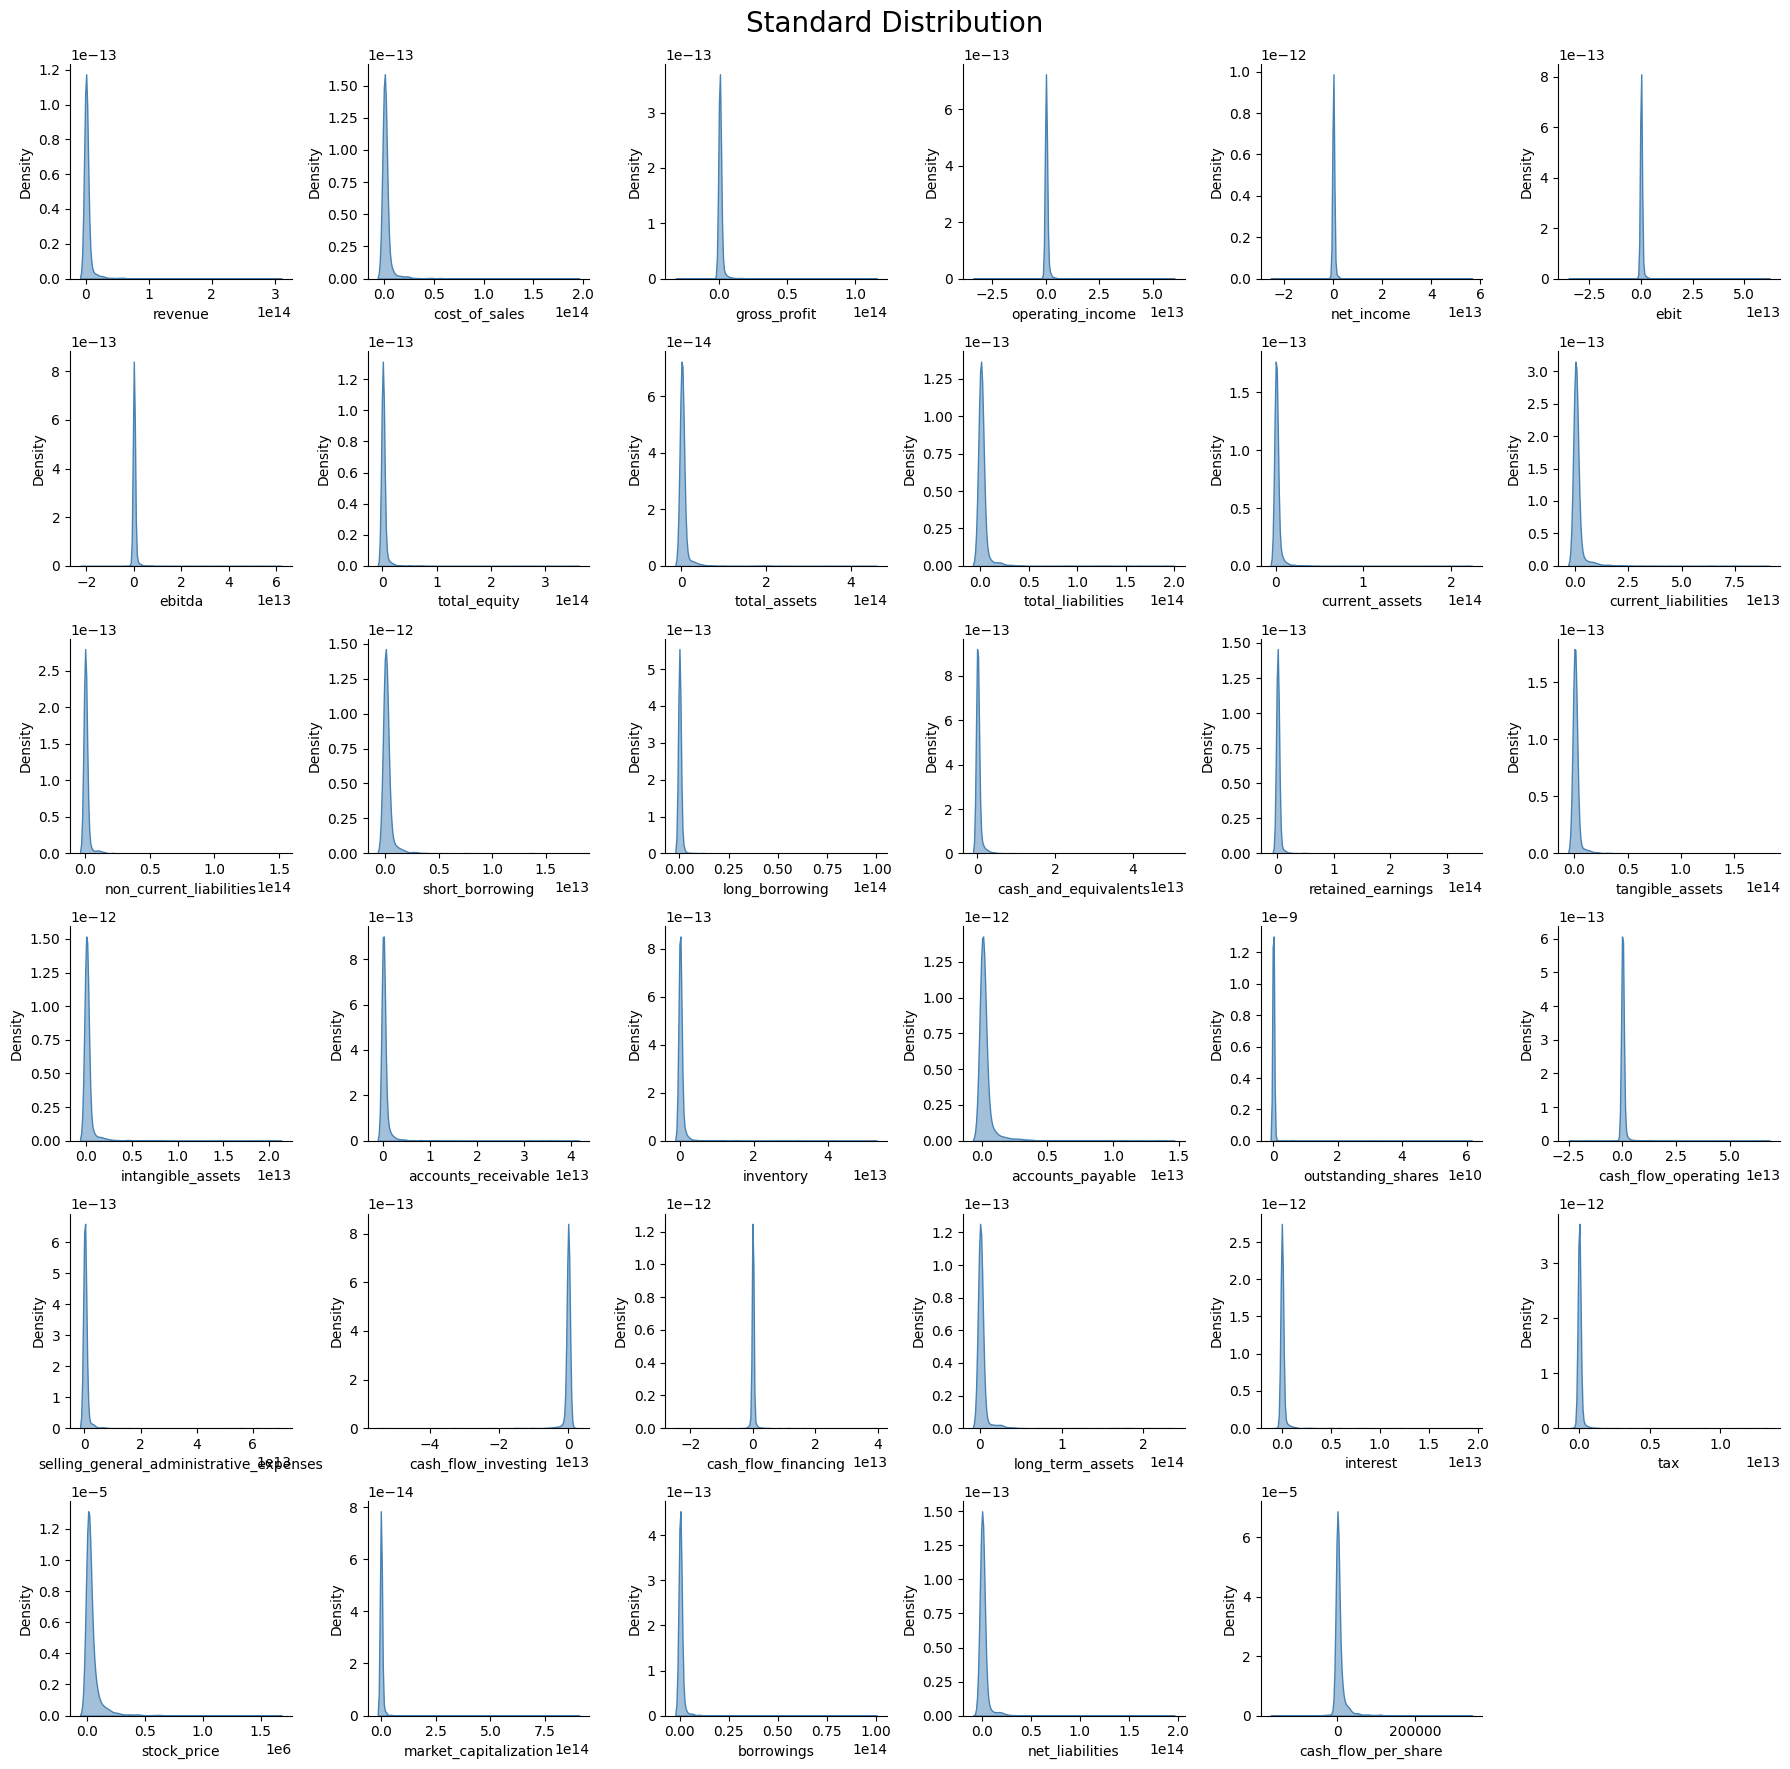

In [70]:
relevant_features = feature_combined.columns[4:]


def plot_standard_distribution(data, feature, ax):
    sns.kdeplot(data[feature], fill=True, alpha=0.5, color="steelblue", ax=ax)

    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("Density")


fig, axes = plt.subplots(6, 6, figsize=(18, 18))

fig.suptitle("Standard Distribution", fontsize=20)

for i, feature in enumerate(relevant_features):
    ax = axes[i // 6, i % 6]
    plot_standard_distribution(feature_combined, feature, ax)

if len(relevant_features) < 36:
    for i in range(len(relevant_features), 36):
        fig.delaxes(axes[i // 6, i % 6])

sns.despine()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

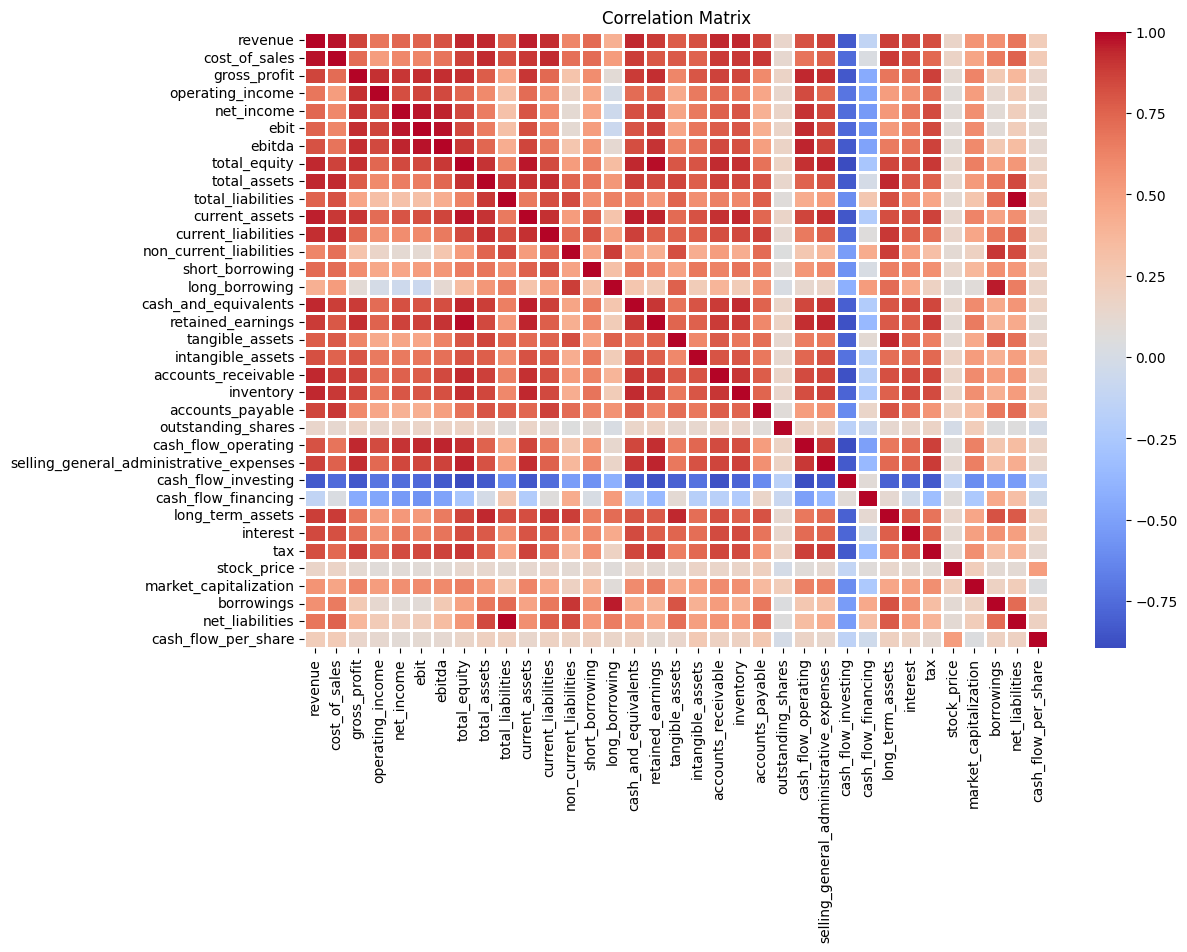

In [71]:
correlation_matrix = feature_combined.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=2)
plt.title("Correlation Matrix")
plt.show()

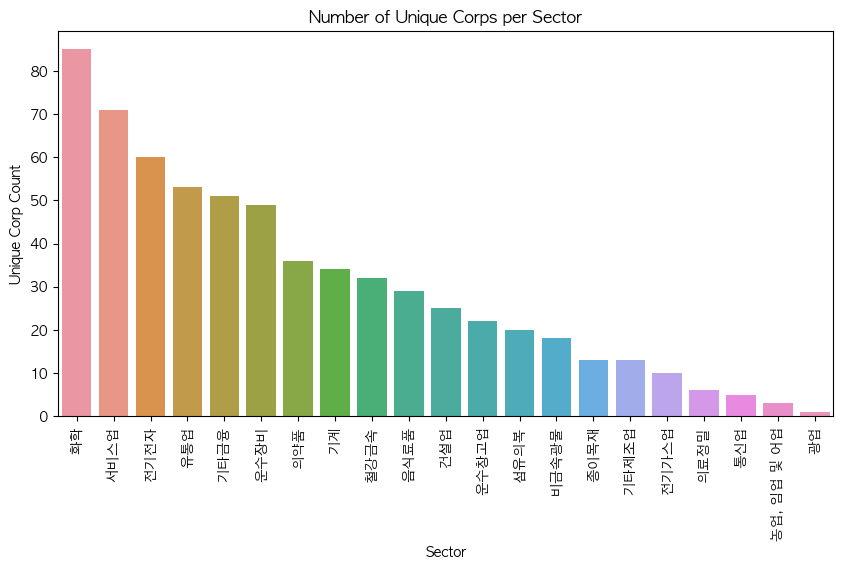

In [74]:
import matplotlib
matplotlib.rcParams["font.family"] = "AppleGothic"
matplotlib.rcParams["axes.unicode_minus"] = False

unique_corp_counts = feature_combined.groupby("sector")["corp"].nunique()
sorted_unique_corp_counts = unique_corp_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_unique_corp_counts.index, y=sorted_unique_corp_counts.values)
plt.xlabel("Sector")
plt.ylabel("Unique Corp Count")
plt.title("Number of Unique Corps per Sector")
plt.xticks(rotation=90)
plt.show()

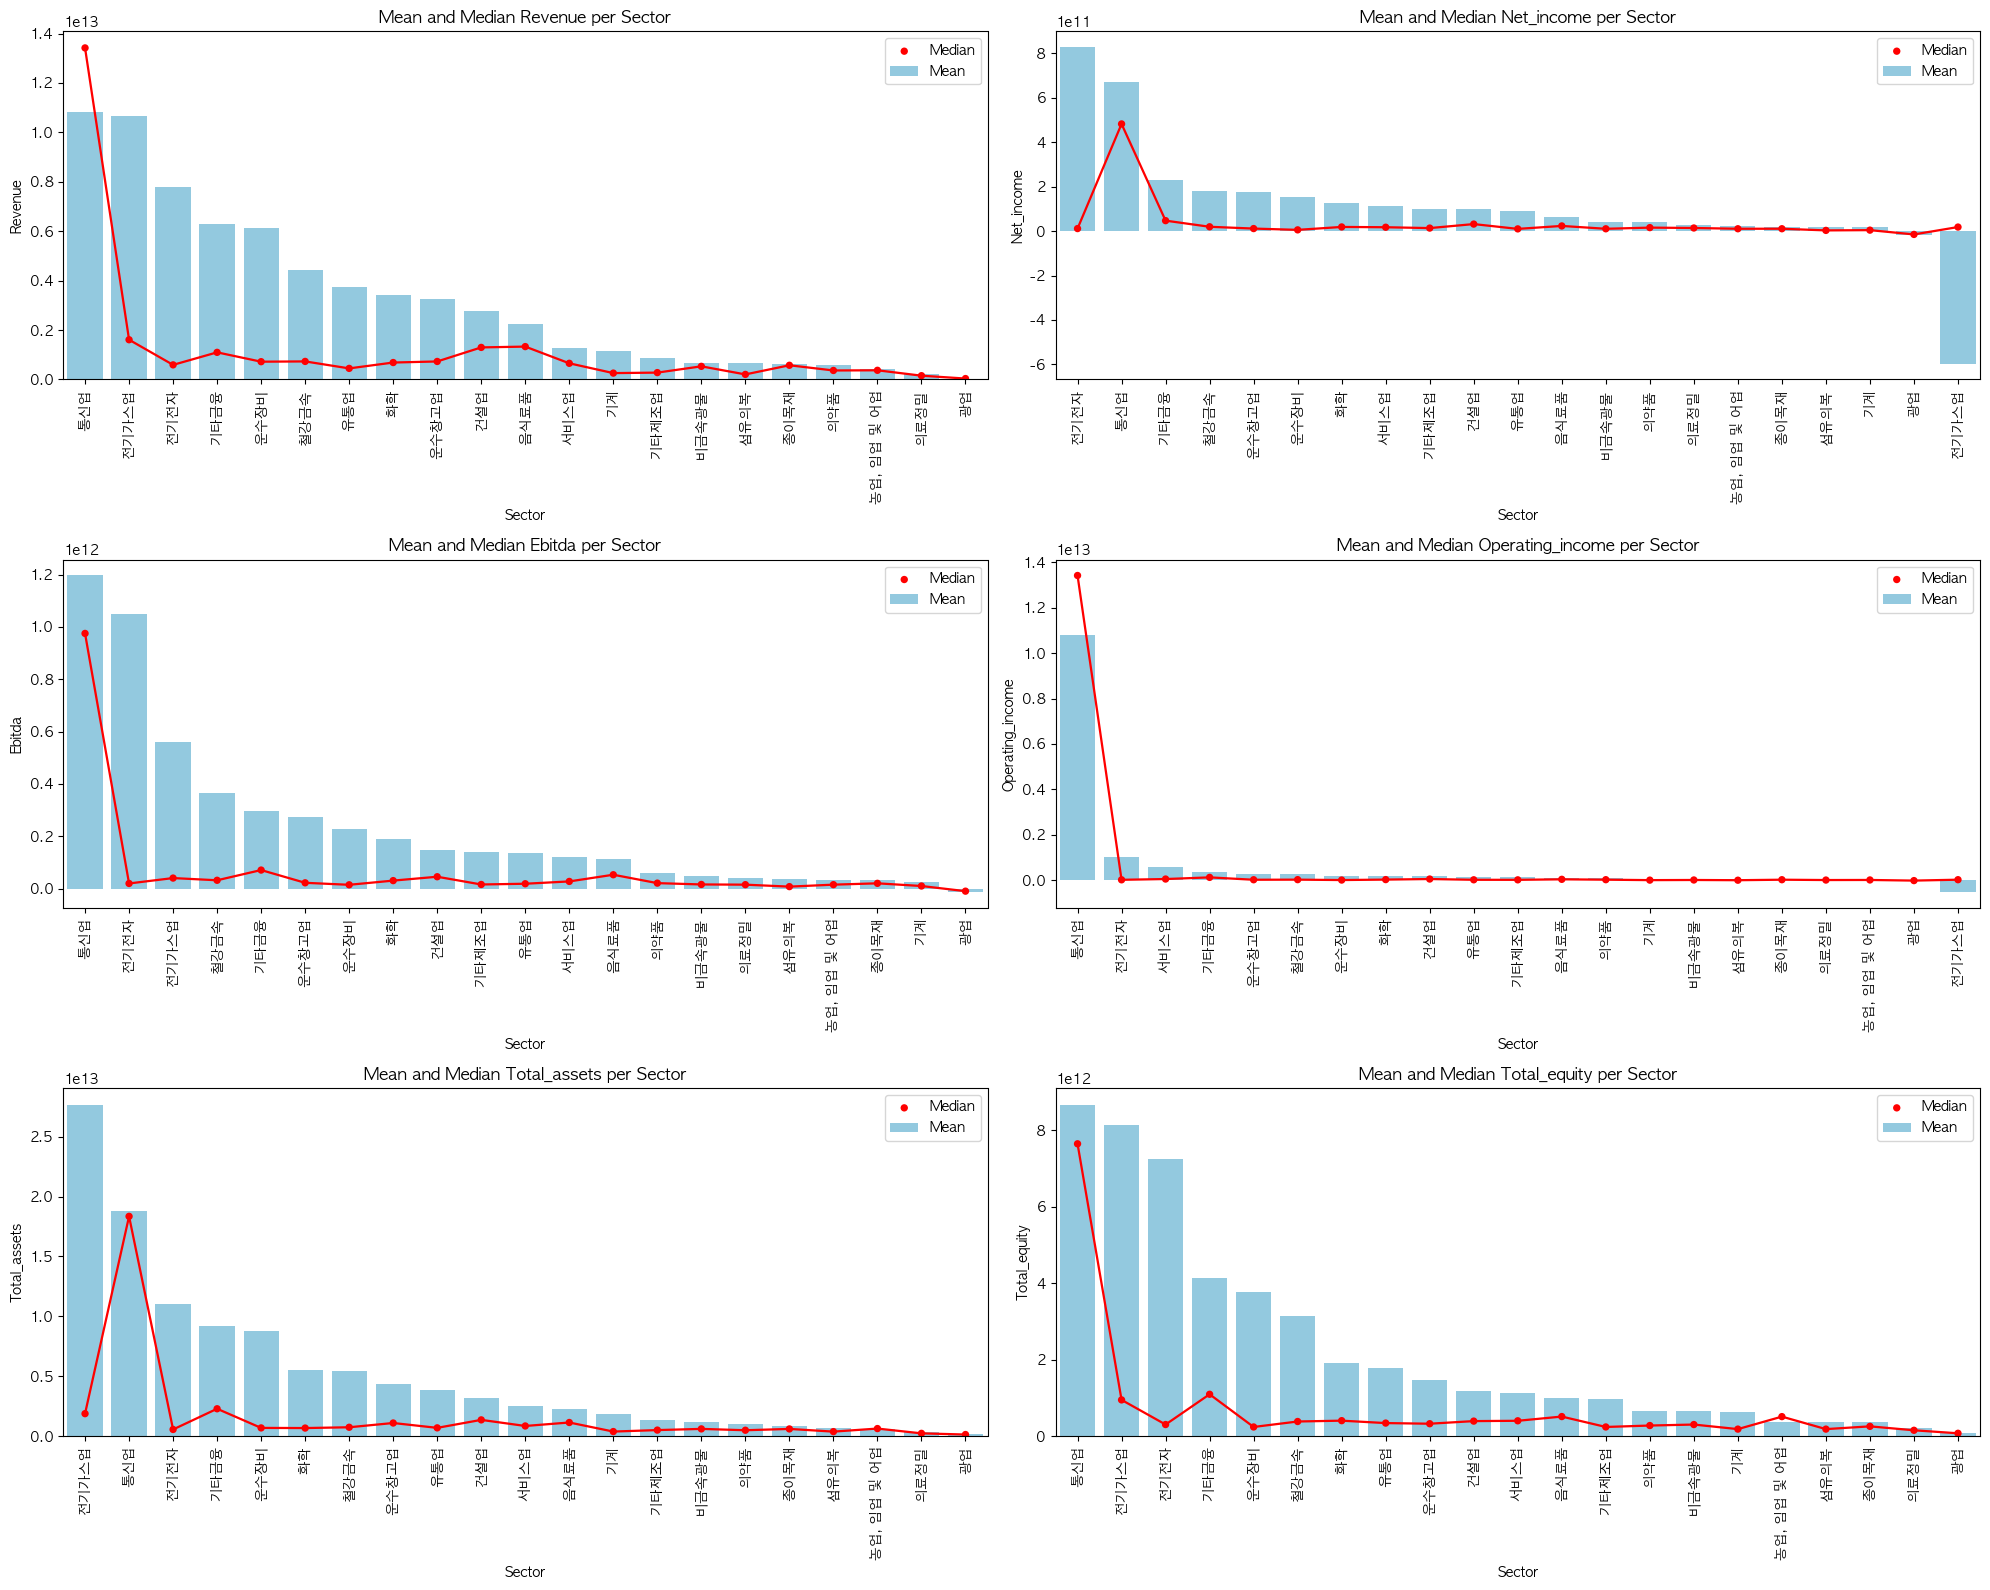

In [75]:
features = [
    "revenue",
    "net_income",
    "ebitda",
    "operating_income",
    "total_assets",
    "total_equity",
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

axes = axes.flatten()

for i, feature in enumerate(features):
    average = feature_combined.groupby("sector")[feature].mean()
    median = feature_combined.groupby("sector")[feature].median()

    sorted_index = average.sort_values(ascending=False).index

    sns.barplot(
        x=sorted_index,
        y=average[sorted_index],
        color="skyblue",
        label="Mean",
        ax=axes[i],
    )

    sns.pointplot(
        x=sorted_index,
        y=median[sorted_index],
        color="red",
        label="Median",
        scale=0.6,
        ax=axes[i],
    )

    axes[i].set_xlabel("Sector")
    axes[i].set_ylabel(feature.capitalize())
    axes[i].set_title(f"Mean and Median {feature.capitalize()} per Sector")
    axes[i].tick_params(axis="x", rotation=90)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [76]:
feature_combined.to_csv("final_features.csv", encoding="utf-8-sig", index=False)

In [77]:
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

username = "multi"
password = "Campus123!"
hostname = "ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com"
database_name = "Data_Warehouse"

desired_table_name = "final_features"

cnx = pymysql.connect(user=username, password=password, host=hostname)
cursor = cnx.cursor()

engine = create_engine(
    "mysql+pymysql://{user}:{pw}@{host}/{db}".format(
        user=username, pw=password, db=database_name, host=hostname
    )
)
Session = sessionmaker(bind=engine)
session = Session()

try:
    feature_combined.to_sql(
        desired_table_name, con=engine, if_exists="replace", index=False, chunksize=1000
    )
    session.commit()
except:
    session.rollback()
    raise
finally:
    session.close()

cursor.close()
cnx.close()